# **🏠 부동산 실거래가 Baseline code**
> 부동산 실거래가 예측 대회에 오신 여러분 환영합니다! 🎉     
> 아래 baseline에서는 RandomForest를 활용해 ML 방법론들을 실제 대회에 적용해보도록 하겠습니다.
> 강의는 google colab으로 실행하였기에 아래의 베이스라인 코드와는 일부 차이가 있을 수 있습니다. 

## Contents
- Library Import
- Data Load
- Data Preprocessing
- Feature Engineering
- Model Training
- Inference
- Output File Save


## 1. Library Import
- 필요한 라이브러리를 불러옵니다.

In [89]:
# !pip install eli5==0.13.0

# # 한글 폰트 사용을 위한 라이브러리입니다.
# !apt-get install -y fonts-nanum

In [90]:
# # visualization
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# fe = fm.FontEntry(
#     fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
#     name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
# fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
# plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
# plt.rc('font', family='NanumBarunGothic')
# import seaborn as sns

# # utils
# import pandas as pd
# import numpy as np
# from tqdm import tqdm
# import pickle
# import warnings;warnings.filterwarnings('ignore')

# # Model
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.ensemble import RandomForestRegressor
# from sklearn import metrics

# import eli5
# from eli5.sklearn import PermutationImportance

## 2. Data Load

#### 2.1. 데이터 로드

In [91]:
# import os
# os.getcwd()

In [92]:
# # 필요한 데이터를 load 하겠습니다. 경로는 환경에 맞게 지정해주면 됩니다.
# train_path = '../data/train.csv'
# test_path  = '../data/test.csv'
# dt = pd.read_csv(train_path)
# dt_test = pd.read_csv(test_path)

In [93]:
# # train/test 구분을 위한 칼럼을 하나 만들어 줍니다.
# dt['is_test'] = 0
# dt_test['is_test'] = 1
# concat = pd.concat([dt, dt_test])     # 하나의 데이터로 만들어줍니다.

In [94]:
# # 칼럼 이름을 쉽게 바꿔주겠습니다. 다른 칼럼도 사용에 따라 바꿔주셔도 됩니다!
# concat = concat.rename(columns={'전용면적(㎡)':'전용면적'})

In [95]:
# # 주소로 unique id를 만들어봅니다

# concat['본번'] = concat['본번'].fillna(-1)
# concat['부번'] = concat['부번'].fillna(-1)

# concat['본번'] = concat['본번'].astype(int).astype(str).replace({-1: np.nan})
# concat['부번'] = concat['부번'].astype(int).astype(str).replace({-1: np.nan})

# concat['지번_temp'] = concat['본번'] + '-' + concat['부번']

# concat['번지'] = concat['번지'].fillna(concat['지번_temp'])
# concat['번지'].isnull().sum()

# concat = concat.drop('지번_temp', axis=1)

In [96]:
# # 본번, 부번의 경우 float로 되어있지만 범주형 변수의 의미를 가지므로 object(string) 형태로 바꾸어주고 아래 작업을 진행하겠습니다.
# concat['본번'] = concat['본번'].astype('str')
# concat['부번'] = concat['부번'].astype('str')


# # '시군구'와 '번지'를 이용해 unique id를 만들어준다
# concat['주소'] = concat['시군구'] + ' ' + concat['번지']

### xy좌표 결측치를 제거해봅니다

In [97]:
# # xy좌표를 불러오고 unique id를 맞춰준다

# coordinates = pd.read_csv('../data/xy좌표.csv', encoding='cp949')

# coordinates['주소'] = coordinates['시군구'] + ' ' + coordinates['번지']

In [98]:
# concat_temp = pd.merge(concat, coordinates, on='주소', how='left', suffixes=('_A', '_B'))

# concat = concat_temp

# concat = concat.drop(columns=['시군구_B', '번지_B'])

# concat = concat.rename(columns={'시군구_A':'시군구'})
# concat = concat.rename(columns={'번지_A':'번지'})

### xy좌표 결측치 채우기(주소로 정렬한 후 선형보간으로 채우기)

In [99]:
# # xy좌표 결측치 채우기(주소로 정렬한 후 선형보간으로 채우기)

# concat_sorted = concat.sort_values(by='주소')

# # 연속형 변수에 대한 보간 (선형 보간)
# col = ['x', 'y']
# concat_sorted[col] = concat_sorted[col].interpolate(method='linear', axis=0)

# concat = concat_sorted.sort_index()

In [100]:
# concat['계약년월'] = concat['계약년월'].astype(str)

# concat['계약년'] = concat['계약년월'].str[:4]
# concat['계약월'] = concat['계약년월'].str[4:]

# concat['계약년'] = concat['계약년'].astype(int)
# concat['계약월'] = concat['계약월'].astype(int)

In [101]:
# # 해제사유발생 = 1, 미발생 = 0 으로 바꾸기

# concat['거래취소여부'] = concat['해제사유발생일'].notnull().astype(int)

# concat['거래취소여부'].value_counts()

# concat = concat.drop(columns = '해제사유발생일',  errors='ignore')

In [102]:
# # 불필요한 컬럼 제거

# drop_columns = ['아파트명', '도로명', '등기신청일자', '거래유형', '중개사소재지', '좌표X', '좌표Y','계약년월'
#                 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-관리방식', 'k-난방방식', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
#                 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지', '단지승인일',
#                 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '기타/의무/임대/임의=1/2/3/4', '사용허가여부', '관리비 업로드', '단지신청일'
#                 ]

# concat = concat.drop(columns = drop_columns,  errors='ignore')

In [103]:
# concat.columns

In [104]:
# # 거래일 건물연식

# concat['거래일건물연식'] = concat['계약년'] - concat['건축년도']

In [105]:
# # 시군구, 년월 등 분할할 수 있는 변수들은 세부사항 고려를 용이하게 하기 위해 모두 분할해 주겠습니다.
# concat['구'] = concat['시군구'].map(lambda x : x.split()[1])
# concat['동'] = concat['시군구'].map(lambda x : x.split()[2])
# del concat['시군구']

# # concat_select['계약년'] = concat_select['계약년월'].astype('str').map(lambda x : x[:4])
# # concat_select['계약월'] = concat_select['계약년월'].astype('str').map(lambda x : x[4:])
# del concat['계약년월']

In [106]:
# all = list(concat['구'].unique())
# gangnam = ['강서구', '영등포구', '동작구', '서초구', '강남구', '송파구', '강동구']
# gangbuk = [x for x in all if x not in gangnam]

# assert len(all) == len(gangnam) + len(gangbuk)       # 알맞게 분리되었는지 체크합니다.

# # 강남의 여부를 체크합니다.
# is_gangnam = []
# for x in concat['구'].tolist() :
#   if x in gangnam :
#     is_gangnam.append(1)
#   else :
#     is_gangnam.append(0)

# # 파생변수를 하나 만릅니다.
# concat['강남여부'] = is_gangnam

In [107]:
# # 따라서 2009년 이후에 지어졌으면 비교적 신축이라고 판단하고, 신축 여부 변수를 제작해보도록 하겠습니다.
# # 노후건축물 기준에 맞추어 거래일 기준 20년 미만일 시 신축으로 분류
# concat['신축여부'] = concat['거래일건물연식'].apply(lambda x: 1 if x < 20 else 0)

In [108]:
# # EDA에 앞서 결측치를 확인해보겠습니다.
# concat.isnull().sum()

# # concat.columns

In [109]:
# concat.to_csv('../data/base_dataset.csv', index=False)

### 기본 데이터셋 정의

In [110]:
# # 위 코드까지 실행할 결과를 새로운 기본 데이터셋으로 삼음
# concat = pd.read_csv('../data/base_dataset.csv')

# drop_col = ['k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-복도유형', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', '건축면적', '주차대수']

# concat = concat.drop(columns = drop_col, errors = 'ignore')

### 빈 데이터를 채움

In [111]:
# # 지번별 건물정보가 담긴 gis건물통합정보 파일을 불러와 데이터 병합하기

# gis = pd.read_csv('../data/gis건물통합정보.csv')

# drop_col = ['Unnamed: 0', '법정동명', '번지', '사용승인일자']
# gis = gis.drop(columns = drop_col)

# gis = gis.rename(columns={'ID':'주소'})

# gis= gis.groupby('주소', as_index=False).agg({'건축면적': 'sum', '연면적': 'sum', '대지면적': 'sum', '건폐율': 'sum', '용적율': 'sum'})

# gis.head()

In [112]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# # IterativeImputer 사용 보간
# concat_temp = pd.merge(concat, gis, on='주소', how='left', suffixes=('_A', '_B'))
# concat_temp.sort_values('주소')

# col = ['건축면적', '연면적', '대지면적', '건폐율', '용적율']
# concat_temp[col] = concat_temp[col].replace(0, np.nan)

# imputer = IterativeImputer(max_iter=10, random_state=0)
# concat_temp[col] = pd.DataFrame(imputer.fit_transform(concat_temp[col]), columns=[col])


# concat_temp.sort_index()

# concat = concat_temp

In [113]:
# concat['거래취소여부'].astype(str)
# concat['강남여부'].astype(str)
# concat['층'].astype(str)
# concat['본번'].astype(str)
# concat['부번'].astype(str)

In [114]:
# concat.to_csv('../data/base_dataset_2.csv', index=False)

### target값을 제곱미터당 가격으로 변경

In [115]:
# concat = pd.read_csv('../data/base_dataset_2.csv')

In [116]:
# # 평균층수 파생변수 추가
# concat['평균층수'] = concat['연면적'] / concat['건축면적']

In [117]:
# # target값을 평당 가격으로 바꿈 -> 최종 결과때 다시 new_target을 전용면적으로 곱하여 rmes구해야함

# concat.rename(columns={'target': 'target_original'}, inplace=True)

# concat['target'] = concat['target_original'] / concat['전용면적']

# # concat.info()

In [118]:
# concat = concat.drop(columns = 'target_original')

In [119]:
# str_columns = ['본번', '부번', '거래취소여부', '구', '동', '강남여부', '신축여부']

# concat[str_columns] = concat[str_columns].astype(str)

# # concat.info()

In [120]:
# concat.to_csv('../data/base_dataset_2.csv', index=False)

### dataset_2 시작

In [209]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

In [210]:
concat = pd.read_csv('../data/base_dataset_2.csv')

concat.columns

Index(['번지', '본번', '부번', '전용면적', '계약일', '층', '건축년도', 'is_test', '주소', 'x', 'y',
       '계약년', '계약월', '거래취소여부', '거래일건물연식', '구', '동', '강남여부', '신축여부', '건축면적',
       '연면적', '대지면적', '건폐율', '용적율', '평균층수', 'target'],
      dtype='object')

In [211]:
str_columns = ['본번', '부번', '거래취소여부', '구', '동', '강남여부', '신축여부']

concat[str_columns] = concat[str_columns].astype(str)

In [212]:
# 먼저, 연속형 변수와 범주형 변수를 위 info에 따라 분리해주겠습니다.
continuous_columns = []
categorical_columns = []

for column in concat.columns:
    if pd.api.types.is_numeric_dtype(concat[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['전용면적', '계약일', '층', '건축년도', 'is_test', 'x', 'y', '계약년', '계약월', '거래일건물연식', '건축면적', '연면적', '대지면적', '건폐율', '용적율', '평균층수', 'target']
범주형 변수: ['번지', '본번', '부번', '주소', '거래취소여부', '구', '동', '강남여부', '신축여부']


- 연속형 변수와 범주형 변수가 알맞게 나누어졌는지 확인해보고, 이제 각각 보간을 진행합니다.

In [213]:
# 범주형 변수에 대한 보간
concat[categorical_columns] = concat[categorical_columns].fillna('NULL')

# 연속형 변수에 대한 보간 (선형 보간)
concat[continuous_columns] = concat[continuous_columns].interpolate(method='linear', axis=0)

In [214]:
concat.isnull().sum()         # 결측치가 보간된 모습을 확인해봅니다.

번지         0
본번         0
부번         0
전용면적       0
계약일        0
층          0
건축년도       0
is_test    0
주소         0
x          0
y          0
계약년        0
계약월        0
거래취소여부     0
거래일건물연식    0
구          0
동          0
강남여부       0
신축여부       0
건축면적       0
연면적        0
대지면적       0
건폐율        0
용적율        0
평균층수       0
target     0
dtype: int64

In [215]:
# 이상치 제거 이전의 shape은 아래와 같습니다.
print(concat.shape)

(1141120, 26)


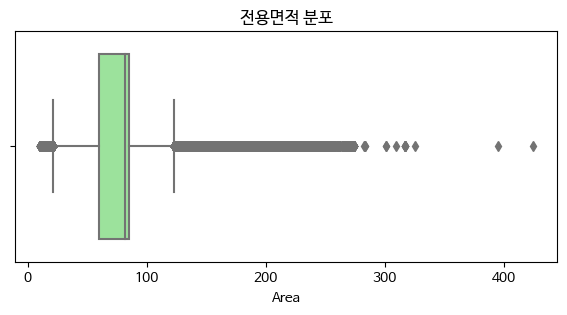

In [216]:
# 대표적인 연속형 변수인 “전용 면적” 변수 관련한 분포를 먼저 살펴보도록 하겠습니다.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat, x = '전용면적', color='lightgreen')
plt.title('전용면적 분포')
plt.xlabel('Area')
plt.show()

In [217]:
# 계약년, 계약월, 계약일을 기준으로 시간 순서대로 정렬
concat = concat.sort_values(by=['계약년', '계약월', '계약일']).reset_index(drop=True)

In [218]:
# 상위 1000개 데이터 중에서 '계약년', '계약월', '계약일' 열만 선택
result = concat[['계약년', '계약월', '계약일']].head(100000)

# 결과 출력
print(result)

        계약년  계약월  계약일
0      2007    1    1
1      2007    1    1
2      2007    1    1
3      2007    1    1
4      2007    1    1
...     ...  ...  ...
99995  2008    6    5
99996  2008    6    5
99997  2008    6    5
99998  2008    6    5
99999  2008    6    5

[100000 rows x 3 columns]


In [219]:
# 이상치 제거 방법에는 IQR을 이용하겠습니다.
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data 내에 있는 이상치만 제거하도록 하겠습니다.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test data와 다시 합쳐주겠습니다.
    return result

In [220]:
# 위 방법으로 전용 면적에 대한 이상치를 제거해보겠습니다.
concat_select = remove_outliers_iqr(concat, '전용면적')

In [221]:
concat_select['is_test'].value_counts()     # 또한, train data만 제거되었습니다.

0    1041193
1       9390
Name: is_test, dtype: int64

In [222]:
concat_select.info()       # 최종 데이터셋은 아래와 같습니다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050583 entries, 0 to 1141119
Data columns (total 26 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   번지       1050583 non-null  object 
 1   본번       1050583 non-null  object 
 2   부번       1050583 non-null  object 
 3   전용면적     1050583 non-null  float64
 4   계약일      1050583 non-null  int64  
 5   층        1050583 non-null  int64  
 6   건축년도     1050583 non-null  int64  
 7   is_test  1050583 non-null  int64  
 8   주소       1050583 non-null  object 
 9   x        1050583 non-null  float64
 10  y        1050583 non-null  float64
 11  계약년      1050583 non-null  int64  
 12  계약월      1050583 non-null  int64  
 13  거래취소여부   1050583 non-null  object 
 14  거래일건물연식  1050583 non-null  int64  
 15  구        1050583 non-null  object 
 16  동        1050583 non-null  object 
 17  강남여부     1050583 non-null  object 
 18  신축여부     1050583 non-null  object 
 19  건축면적     1050583 non-null  float64
 20  연면

- 이제 위에서 만든 파생변수들과 정제한 데이터를 기반으로 본격적으로 부동산 실거래가를 예측하는 모델링을 진행하겠습니다.
- 모델링에는 `sklearn`의 `RandomForest`를 이용하도록 하겠습니다.

- 참고 ✅
  - `RandomForest`는 배깅(Bagging)의 일종으로, 학습시키는 데이터 뿐 아니라 특성변수(X)들도 무작위로 선택해 트리를 생성하는 방법입니다.
  - 모델 학습 과정에서 서로 다른 N개의 Tree 생성하고, N개의 Tree에서 발생한 Output을 Voting(범주형, 분류문제)하거나, Average(연속형, 회귀문제)해 최종 Output 생성합니다.
  - 이는 High variance, Low bias 상황에서 분산(Variance) 감소에 도움을 줍니다.

In [223]:
# 이제 다시 train과 test dataset을 분할해줍니다. 위에서 제작해 놓았던 is_test 칼럼을 이용합니다.
dt_train = concat_select.query('is_test==0')
dt_test = concat_select.query('is_test==1')

# 이제 is_test 칼럼은 drop해줍니다.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

# dt_test의 target은 일단 0으로 임의로 채워주도록 하겠습니다.
dt_test['target'] = 0

(1041193, 25) (9390, 25)


### 5.1. 범주형 변수 Encoding
- 범주형 변수는 그대로 모델에 투입하면, 모델이 제대로 작동할 수 없습니다.
- 따라서 **레이블 인코딩 과정**을 통해 범주형 변수들을 numeric하게 바꾸는 인코딩 과정을 진행해주도록 하겠습니다.

In [224]:
# 파생변수 제작으로 추가된 변수들이 존재하기에, 다시한번 연속형과 범주형 칼럼을 분리해주겠습니다.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("연속형 변수:", continuous_columns_v2)
print("범주형 변수:", categorical_columns_v2)


# 아래에서 범주형 변수들을 대상으로 레이블인코딩을 진행해 주겠습니다.

# 각 변수에 대한 LabelEncoder를 저장할 딕셔너리
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns ):
    lbl = LabelEncoder()

    # Label-Encoding을 fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # 나중에 후처리를 위해 레이블인코더를 저장해주겠습니다.

    # Test 데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가해줍니다.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label 데이터인 경우
        lbl.classes_ = np.append(lbl.classes_, label) # 미처리 시 ValueError발생하니 주의하세요!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))


연속형 변수: ['전용면적', '계약일', '층', '건축년도', 'x', 'y', '계약년', '계약월', '거래일건물연식', '건축면적', '연면적', '대지면적', '건폐율', '용적율', '평균층수', 'target']
범주형 변수: ['번지', '본번', '부번', '주소', '거래취소여부', '구', '동', '강남여부', '신축여부']


100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


In [225]:
# 계약년의 최소, 최대, 평균값 출력
contract_year_train = dt_train['계약년']
print(f"계약년 최소값: {contract_year_train.min()}")
print(f"계약년 최대값: {contract_year_train.max()}")
print(f"계약년 평균값: {contract_year_train.mean()}")

계약년 최소값: 2007
계약년 최대값: 2023
계약년 평균값: 2014.6170479440411


In [226]:
# 계약년, 계약월에 결측값이 있는지 확인
missing_contract_year = dt_train['계약년'].isnull().sum()
missing_contract_month = dt_train['계약월'].isnull().sum()

print(f"계약년 결측값 개수: {missing_contract_year}")
print(f"계약월 결측값 개수: {missing_contract_month}")

# 계약년, 계약월에 결측값이 있는지 확인
missing_contract_year_test = dt_test['계약년'].isnull().sum()
missing_contract_month_test = dt_test['계약월'].isnull().sum()

print(f"계약년 결측값 개수: {missing_contract_year_test}")
print(f"계약월 결측값 개수: {missing_contract_month_test}")

계약년 결측값 개수: 0
계약월 결측값 개수: 0
계약년 결측값 개수: 0
계약월 결측값 개수: 0


In [227]:
from sklearn.preprocessing import MinMaxScaler

# LSTM 모델을 위한 연속형 변수들만 따로 관리
lstm_continuous_columns = continuous_columns_v2.copy()
print("LSTM 모델을 위한 연속형 변수들:", lstm_continuous_columns)

# 계약년, 계약월, 계약일을 주기성을 유지하면서 스케일링 처리
# 계약년을 따로 저장해두고 이후 스케일링할 예정
contract_year_train = dt_train['계약년'].copy()
contract_year_test = dt_test['계약년'].copy()

# 계약월, 계약일은 나중에 cyclic_transform으로 변환할 것이므로 제거
lstm_continuous_columns.remove('계약월')
lstm_continuous_columns.remove('계약일')

# 계약월, 계약일은 주기성을 고려해 sin/cos 변환
def cyclic_transform(df, column, max_val):
    df[f'{column}_sin'] = np.sin(2 * np.pi * df[column] / max_val)
    df[f'{column}_cos'] = np.cos(2 * np.pi * df[column] / max_val)
    df.drop(column, axis=1, inplace=True)

cyclic_transform(dt_train, '계약월', 12)
cyclic_transform(dt_test, '계약월', 12)
cyclic_transform(dt_train, '계약일', 31)
cyclic_transform(dt_test, '계약일', 31)

# 새로 추가된 sin, cos 변환 컬럼을 lstm_continuous_columns에 추가
lstm_continuous_columns.extend(['계약월_sin', '계약월_cos', '계약일_sin', '계약일_cos'])

# 계약년을 스케일링 (Min-Max Scaling, 2025년 기준)
def scale_contract_year(train_years, test_years):
    max_year = 2025
    min_year = train_years.min()  # 훈련 데이터 기준으로 최소 계약년
    train_scaled = (train_years - min_year) / (max_year - min_year)
    test_scaled = (test_years - min_year) / (max_year - min_year)
    return train_scaled, test_scaled

contract_year_train_scaled, contract_year_test_scaled = scale_contract_year(contract_year_train, contract_year_test)

# 스케일링된 계약년을 다시 데이터프레임에 추가
dt_train['계약년'] = contract_year_train_scaled
dt_test['계약년'] = contract_year_test_scaled 

# 계약년을 다시 lstm_continuous_columns에 추가
lstm_continuous_columns.append('계약년')

# 스케일링된 데이터를 새로운 변수에 저장
scaled_train_lstm = dt_train[lstm_continuous_columns].copy()
scaled_test_lstm = dt_test[lstm_continuous_columns].copy()

# 나머지 연속형 변수들에 대해 스케일링 (Min-Max Scaling)
scaler = MinMaxScaler()
scaled_train_lstm = scaler.fit_transform(scaled_train_lstm)
scaled_test_lstm = scaler.transform(scaled_test_lstm)

print("최종 LSTM 모델을 위한 연속형 변수들:", lstm_continuous_columns)

LSTM 모델을 위한 연속형 변수들: ['전용면적', '계약일', '층', '건축년도', 'x', 'y', '계약년', '계약월', '거래일건물연식', '건축면적', '연면적', '대지면적', '건폐율', '용적율', '평균층수', 'target']
최종 LSTM 모델을 위한 연속형 변수들: ['전용면적', '층', '건축년도', 'x', 'y', '계약년', '거래일건물연식', '건축면적', '연면적', '대지면적', '건폐율', '용적율', '평균층수', 'target', '계약월_sin', '계약월_cos', '계약일_sin', '계약일_cos', '계약년']


In [228]:
print("스케일링된 훈련 데이터 일부:", scaled_train_lstm[:5])
print("스케일링된 테스트 데이터 일부:", scaled_test_lstm[:5])

스케일링된 훈련 데이터 일부: [[6.21159735e-01 1.44927536e-01 6.77419355e-01 9.13925834e-01
  4.25897652e-01 0.00000000e+00 2.08333333e-01 6.19809433e-03
  6.71013585e-04 2.58788143e-04 4.21648793e-04 5.39839926e-04
  4.35959258e-03 3.70154911e-02 7.50000000e-01 9.33012702e-01
  6.00778609e-01 9.89738647e-01 0.00000000e+00]
 [3.78148770e-01 1.59420290e-01 7.25806452e-01 8.83990247e-01
  3.99480128e-01 0.00000000e+00 1.66666667e-01 6.30670387e-03
  9.50241567e-04 1.46374968e-04 8.82582552e-04 8.67948541e-04
  4.51392683e-03 3.93723735e-02 7.50000000e-01 9.33012702e-01
  6.00778609e-01 9.89738647e-01 0.00000000e+00]
 [3.78247555e-01 2.60869565e-01 6.12903226e-01 8.47051115e-02
  5.58059524e-01 0.00000000e+00 2.63888889e-01 8.06509013e-03
  2.68358432e-03 1.27812658e-02 4.34489568e-03 3.76412633e-03
  4.31852658e-03 5.62149242e-02 7.50000000e-01 9.33012702e-01
  6.00778609e-01 9.89738647e-01 0.00000000e+00]
 [3.77852415e-01 1.73913043e-01 5.48387097e-01 6.84389087e-01
  7.70073573e-01 0.00000000e+00 3

In [229]:
scaled_train_lstm

array([[0.62115974, 0.14492754, 0.67741935, ..., 0.60077861, 0.98973865,
        0.        ],
       [0.37814877, 0.15942029, 0.72580645, ..., 0.60077861, 0.98973865,
        0.        ],
       [0.37824756, 0.26086957, 0.61290323, ..., 0.60077861, 0.98973865,
        0.        ],
       ...,
       [0.6253087 , 0.13043478, 0.5483871 , ..., 0.39922139, 0.98973865,
        1.        ],
       [0.37607429, 0.37681159, 0.58064516, ..., 0.39922139, 0.98973865,
        1.        ],
       [0.62481478, 0.27536232, 0.74193548, ..., 0.39922139, 0.98973865,
        1.        ]])

In [230]:
dt_train['target'].values

array([ 331.08667376,  351.84258796,  500.16672224, ...,  858.92457936,
       1062.58366801, 1412.76194961])

In [231]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# LSTM 모델을 위한 데이터 준비
X_train_lstm = scaled_train_lstm  # 스케일링된 train 데이터를 사용
X_test_lstm = scaled_test_lstm    # 스케일링된 test 데이터를 사용
y_train = dt_train['target'].values  # LSTM 모델의 타겟

timesteps = 1  # timestep 설정
n_features = X_train_lstm.shape[1]  # features의 개수

# 시계열 데이터를 3D 형태로 reshape
n_samples_train = (X_train_lstm.shape[0] // timesteps) * timesteps
n_samples_test = (X_test_lstm.shape[0] // timesteps) * timesteps

X_train_lstm_reshaped = np.reshape(X_train_lstm[:n_samples_train], (n_samples_train // timesteps, timesteps, n_features))
X_test_lstm_reshaped = np.reshape(X_test_lstm[:n_samples_test], (n_samples_test // timesteps, timesteps, n_features))

# y_train도 LSTM 입력에 맞게 자르기
y_train_lstm = y_train[:n_samples_train].reshape(-1, timesteps).mean(axis=1)

In [232]:
# 스케일링된 데이터들의 스케일 확인

# scaled_train_lstm, scaled_test_lstm의 스케일 확인 (일부 데이터)
print("스케일링된 훈련 데이터 일부 (scaled_train_lstm):")
print(scaled_train_lstm[:5])

print("\n스케일링된 테스트 데이터 일부 (scaled_test_lstm):")
print(scaled_test_lstm[:5])

# 3D reshape된 데이터 스케일 확인
print("\nLSTM 입력으로 사용되는 3D 형태로 변환된 훈련 데이터 (X_train_lstm_reshaped):")
print(X_train_lstm_reshaped[:5])

print("\nLSTM 입력으로 사용되는 3D 형태로 변환된 테스트 데이터 (X_test_lstm_reshaped):")
print(X_test_lstm_reshaped[:5])

# y_train_lstm의 스케일 확인 (일부 데이터)
print("\nLSTM 모델의 타겟 (y_train_lstm):")
print(y_train_lstm[:5])

스케일링된 훈련 데이터 일부 (scaled_train_lstm):
[[6.21159735e-01 1.44927536e-01 6.77419355e-01 9.13925834e-01
  4.25897652e-01 0.00000000e+00 2.08333333e-01 6.19809433e-03
  6.71013585e-04 2.58788143e-04 4.21648793e-04 5.39839926e-04
  4.35959258e-03 3.70154911e-02 7.50000000e-01 9.33012702e-01
  6.00778609e-01 9.89738647e-01 0.00000000e+00]
 [3.78148770e-01 1.59420290e-01 7.25806452e-01 8.83990247e-01
  3.99480128e-01 0.00000000e+00 1.66666667e-01 6.30670387e-03
  9.50241567e-04 1.46374968e-04 8.82582552e-04 8.67948541e-04
  4.51392683e-03 3.93723735e-02 7.50000000e-01 9.33012702e-01
  6.00778609e-01 9.89738647e-01 0.00000000e+00]
 [3.78247555e-01 2.60869565e-01 6.12903226e-01 8.47051115e-02
  5.58059524e-01 0.00000000e+00 2.63888889e-01 8.06509013e-03
  2.68358432e-03 1.27812658e-02 4.34489568e-03 3.76412633e-03
  4.31852658e-03 5.62149242e-02 7.50000000e-01 9.33012702e-01
  6.00778609e-01 9.89738647e-01 0.00000000e+00]
 [3.77852415e-01 1.73913043e-01 5.48387097e-01 6.84389087e-01
  7.70073573e

In [233]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# LSTM 모델 저장 경로 설정
initial_epochs = 1000  # 한 번에 학습할 에포크 수
model_filename_template = "lstm_model_epoch_{epoch:03d}.keras"  # 에포크 단위로 파일명 설정
model_checkpoint_path = "lstm_model_checkpoint.keras"  # 체크포인트 저장 경로
additional_epochs = 10  # 추가로 학습할 에포크 수

# 저장된 모델이 있는지 확인
if os.path.exists(model_checkpoint_path):
    print(f"Saved model '{model_checkpoint_path}' found. Loading the model...")
    model = load_model(model_checkpoint_path)
    
    # 현재까지 학습된 에포크 수를 불러와 추가 학습할지 결정
    current_epochs = int(model.optimizer.iterations.numpy() // (X_train_lstm_reshaped.shape[0] // 32))
    print(f"Current Epochs: {current_epochs}")
    
    if current_epochs < initial_epochs + additional_epochs:
        print(f"Resuming training from epoch {current_epochs} for {additional_epochs} more epochs.")
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
        model_checkpoint = ModelCheckpoint(model_checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)

        # 추가 학습 진행
        model.fit(X_train_lstm_reshaped, y_train_lstm, 
                  epochs=current_epochs + additional_epochs, 
                  initial_epoch=current_epochs,
                  batch_size=32, validation_split=0.2, 
                  callbacks=[early_stopping, model_checkpoint])

        # 에포크 단위로 모델 저장
        for epoch in range(current_epochs + 1, current_epochs + additional_epochs + 1, 100):
            model.save(model_filename_template.format(epoch=epoch))
            print(f"Model saved at epoch {epoch}")
    else:
        print(f"Model has already trained for {current_epochs} epochs. No further training required.")
else:
    print("No saved model found. Training a new model from scratch...")
    
    # LSTM 모델 구축
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_lstm_reshaped.shape[1], X_train_lstm_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
    model_checkpoint = ModelCheckpoint(model_checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
    
    # 새로운 모델 학습
    model.fit(X_train_lstm_reshaped, y_train_lstm, epochs=initial_epochs,
              batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

    # 에포크 단위로 모델 저장
    for epoch in range(100, initial_epochs + 1, 100):
        model.save(model_filename_template.format(epoch=epoch))
        print(f"Model saved at epoch {epoch}")

In [234]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

# 모델 저장 경로 설정
model_path = "lstm_model_epoch_1000.keras"  # 이미 학습된 모델 경로

# 1. 저장된 LSTM 모델 불러오기
if os.path.exists(model_path):
    print(f"Loading the model from {model_path}...")
    model = load_model(model_path)
else:
    raise FileNotFoundError(f"No saved model found at {model_path}")

# 모델 로드 후 구조 확인
model.summary()

Loading the model from lstm_model_epoch_1000.keras...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        14,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,155 (164.67 KB)

 Trainable params: 14,051 (54.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,104 (109.79 KB)

In [235]:
# 입력 데이터에 NaN 값이 있는지 확인
print(np.isnan(X_test_lstm_reshaped).any())
print(np.isnan(X_train_lstm_reshaped).any())

False
False


In [236]:
# 1. LSTM 모델로 예측값 생성 (입력 데이터는 3차원이어야 함)
# 이미 numpy 배열이므로 .values를 제거하고 바로 reshape 사용
X_train_lstm_reshaped = X_train_lstm.reshape(-1, 1, X_train_lstm.shape[1])
X_test_lstm_reshaped = X_test_lstm.reshape(-1, 1, X_test_lstm.shape[1])

# LSTM 모델로 예측
train_lstm_preds = model.predict(X_train_lstm_reshaped)
test_lstm_preds = model.predict(X_test_lstm_reshaped)

# 예측값 확인
print(len(train_lstm_preds), len(dt_train))

32538/32538 ━━━━━━━━━━━━━━━━━━━━ 17s 504us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
1041193 1041193


In [237]:
X_train_lstm

array([[0.62115974, 0.14492754, 0.67741935, ..., 0.60077861, 0.98973865,
        0.        ],
       [0.37814877, 0.15942029, 0.72580645, ..., 0.60077861, 0.98973865,
        0.        ],
       [0.37824756, 0.26086957, 0.61290323, ..., 0.60077861, 0.98973865,
        0.        ],
       ...,
       [0.6253087 , 0.13043478, 0.5483871 , ..., 0.39922139, 0.98973865,
        1.        ],
       [0.37607429, 0.37681159, 0.58064516, ..., 0.39922139, 0.98973865,
        1.        ],
       [0.62481478, 0.27536232, 0.74193548, ..., 0.39922139, 0.98973865,
        1.        ]])

In [238]:
train_lstm_preds

array([[ 331.18243],
       [ 351.96234],
       [ 500.33588],
       ...,
       [ 858.50836],
       [1062.6285 ],
       [1412.4756 ]], dtype=float32)

In [151]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. 데이터 준비
# LSTM 예측값을 dt_train, dt_test에 추가합니다.
dt_train['lstm_output'] = train_lstm_preds.flatten()
dt_test['lstm_output'] = test_lstm_preds.flatten()

print(dt_train.columns, dt_test.columns)

# Target과 독립변수들을 분리해줍니다.
y_train_xgb = dt_train['target']  # target 변수를 분리합니다.
X_train_xgb = dt_train.drop(columns=['target'])  # target 변수를 제외한 독립 변수

# 독립 변수 출력
print(X_train_xgb.columns)

# 타겟 변수는 Series이므로 columns 속성이 없음 (values 또는 name 속성 사용 가능)
print(y_train_xgb.name)

y_test_xgb = dt_test['target']  # target 변수를 분리합니다.
X_test_xgb = dt_test.drop(columns=['target'])  # target 변수를 제외한 독립 변수

# 독립 변수 출력
print(X_test_xgb.columns)

# 타겟 변수는 Series이므로 values 또는 name 속성 사용 가능
print(y_test_xgb.name)


# XGBoost용 데이터 준비에서 계약일, 계약월을 제외하고 LSTM 예측값 및 추가 변수를 사용
xgb_columns = [col for col in continuous_columns_v2 if col not in ['계약일', '계약월', 'target']]
xgb_columns += categorical_columns_v2 + ['lstm_output', '계약월_sin', '계약월_cos', '계약일_sin', '계약일_cos']

print(xgb_columns)

# 이 코드를 통해 X_train_xgb에서 target이 제외된 변수만 남깁니다.
X_train_xgb = dt_train[xgb_columns]  # 연속형 + 범주형 + LSTM 출력값만 포함
X_test_xgb = dt_test[xgb_columns]  # test 데이터도 동일하게 처리

Index(['번지', '본번', '부번', '전용면적', '층', '건축년도', '주소', 'x', 'y', '계약년', '거래취소여부',
       '거래일건물연식', '구', '동', '강남여부', '신축여부', '건축면적', '연면적', '대지면적', '건폐율',
       '용적율', '평균층수', 'target', '계약월_sin', '계약월_cos', '계약일_sin', '계약일_cos',
       'lstm_output'],
      dtype='object') Index(['번지', '본번', '부번', '전용면적', '층', '건축년도', '주소', 'x', 'y', '계약년', '거래취소여부',
       '거래일건물연식', '구', '동', '강남여부', '신축여부', '건축면적', '연면적', '대지면적', '건폐율',
       '용적율', '평균층수', 'target', '계약월_sin', '계약월_cos', '계약일_sin', '계약일_cos',
       'lstm_output'],
      dtype='object')
Index(['번지', '본번', '부번', '전용면적', '층', '건축년도', '주소', 'x', 'y', '계약년', '거래취소여부',
       '거래일건물연식', '구', '동', '강남여부', '신축여부', '건축면적', '연면적', '대지면적', '건폐율',
       '용적율', '평균층수', '계약월_sin', '계약월_cos', '계약일_sin', '계약일_cos',
       'lstm_output'],
      dtype='object')
target
Index(['번지', '본번', '부번', '전용면적', '층', '건축년도', '주소', 'x', 'y', '계약년', '거래취소여부',
       '거래일건물연식', '구', '동', '강남여부', '신축여부', '건축면적', '연면적', '대지면적', '건폐율',
       '용적율', '평균층수', '계약월_s

In [152]:
print(dt_train.columns)
print(dt_test.columns)
print(X_train_xgb.columns)
print(X_test_xgb.columns)

Index(['번지', '본번', '부번', '전용면적', '층', '건축년도', '주소', 'x', 'y', '계약년', '거래취소여부',
       '거래일건물연식', '구', '동', '강남여부', '신축여부', '건축면적', '연면적', '대지면적', '건폐율',
       '용적율', '평균층수', 'target', '계약월_sin', '계약월_cos', '계약일_sin', '계약일_cos',
       'lstm_output'],
      dtype='object')
Index(['번지', '본번', '부번', '전용면적', '층', '건축년도', '주소', 'x', 'y', '계약년', '거래취소여부',
       '거래일건물연식', '구', '동', '강남여부', '신축여부', '건축면적', '연면적', '대지면적', '건폐율',
       '용적율', '평균층수', 'target', '계약월_sin', '계약월_cos', '계약일_sin', '계약일_cos',
       'lstm_output'],
      dtype='object')
Index(['전용면적', '층', '건축년도', 'x', 'y', '계약년', '거래일건물연식', '건축면적', '연면적', '대지면적',
       '건폐율', '용적율', '평균층수', '번지', '본번', '부번', '주소', '거래취소여부', '구', '동',
       '강남여부', '신축여부', 'lstm_output', '계약월_sin', '계약월_cos', '계약일_sin',
       '계약일_cos'],
      dtype='object')
Index(['전용면적', '층', '건축년도', 'x', 'y', '계약년', '거래일건물연식', '건축면적', '연면적', '대지면적',
       '건폐율', '용적율', '평균층수', '번지', '본번', '부번', '주소', '거래취소여부', '구', '동',
       '강남여부', '신축여부', 'lstm_output'

In [153]:
print(dt_train.columns)
print(dt_train['lstm_output'].head(100000))
print(dt_train.head(100000))

Index(['번지', '본번', '부번', '전용면적', '층', '건축년도', '주소', 'x', 'y', '계약년', '거래취소여부',
       '거래일건물연식', '구', '동', '강남여부', '신축여부', '건축면적', '연면적', '대지면적', '건폐율',
       '용적율', '평균층수', 'target', '계약월_sin', '계약월_cos', '계약일_sin', '계약일_cos',
       'lstm_output'],
      dtype='object')
0         331.182434
1         351.962341
2         500.335876
3         263.555481
4         370.749786
             ...    
103428    664.467407
103429    584.902954
103430    590.616516
103431    428.633392
103432    433.723480
Name: lstm_output, Length: 100000, dtype: float32
          번지    본번   부번   전용면적   층  건축년도    주소           x          y  \
0       3224   866    1  84.57   7  2003   602  127.148512  37.542270   
1       3269   875  106  59.97   8  2006   603  127.137297  37.535581   
2       3056   841    1  59.98  15  1999  1304  126.837836  37.575733   
3       2359   716    2  59.94   9  1995  3280  127.062514  37.629415   
4       3189   860    1  59.34   8  1996  3335  127.072945  37.656181   
...    

In [154]:


# 2. 학습 데이터와 검증 데이터로 분할
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_xgb, y_train_xgb, test_size=0.2, random_state=2023)

# 3. XGBoost 모델 구성 및 학습
xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=10,
    objective='reg:squarederror',
    random_state=2023
)

# XGBoost 모델 학습
xgb_model.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val_split, y_val_split)],  # 검증 데이터 설정
    verbose=True  # 학습 과정 출력
)

# 4. XGBoost 모델로 예측
train_xgb_preds = xgb_model.predict(X_train_xgb)
test_xgb_preds = xgb_model.predict(X_test_xgb)

# 5. 성능 평가 (RMSE)
train_rmse = np.sqrt(mean_squared_error(y_train_xgb, train_xgb_preds))
test_rmse = np.sqrt(mean_squared_error(y_test_xgb, test_xgb_preds))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


[0]	validation_0-rmse:398.00845
[1]	validation_0-rmse:358.42003
[2]	validation_0-rmse:322.81595
[3]	validation_0-rmse:290.77414
[4]	validation_0-rmse:261.93968
[5]	validation_0-rmse:236.01539
[6]	validation_0-rmse:212.69829
[7]	validation_0-rmse:191.74794
[8]	validation_0-rmse:172.92625
[9]	validation_0-rmse:156.02144
[10]	validation_0-rmse:140.82721
[11]	validation_0-rmse:127.18850
[12]	validation_0-rmse:114.97822
[13]	validation_0-rmse:103.99256
[14]	validation_0-rmse:94.14925
[15]	validation_0-rmse:85.32503
[16]	validation_0-rmse:77.46037
[17]	validation_0-rmse:70.44785
[18]	validation_0-rmse:64.21119
[19]	validation_0-rmse:58.59331
[20]	validation_0-rmse:53.58746
[21]	validation_0-rmse:49.17887
[22]	validation_0-rmse:45.30393
[23]	validation_0-rmse:41.87124
[24]	validation_0-rmse:38.83237
[25]	validation_0-rmse:36.21486
[26]	validation_0-rmse:33.96642
[27]	validation_0-rmse:32.02575
[28]	validation_0-rmse:30.26710
[29]	validation_0-rmse:28.79326
[30]	validation_0-rmse:27.50647
[31]

In [155]:
X_val_split.columns

Index(['전용면적', '층', '건축년도', 'x', 'y', '계약년', '거래일건물연식', '건축면적', '연면적', '대지면적',
       '건폐율', '용적율', '평균층수', '번지', '본번', '부번', '주소', '거래취소여부', '구', '동',
       '강남여부', '신축여부', 'lstm_output', '계약월_sin', '계약월_cos', '계약일_sin',
       '계약일_cos'],
      dtype='object')

In [156]:
pred = xgb_model.predict(X_val_split)
y_val_1 = y_val_split * X_val_split['전용면적']
pred_1 = pred * X_val_split['전용면적']

# print(f"Train RMSE: {train_rmse}")
# print(f"Test RMSE: {test_rmse}")

In [194]:
# 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val_1, pred_1))}')

RMSE test: 1238.4936979773254


In [157]:
# import xgboost as xgb
# model = xgb.XGBRegressor(objective='reg:squarederror', 
#                          n_estimators=1000,  
#                          learning_rate=0.1,  
#                          max_depth=10,
#                          random_state=1)

# model.fit(X_train_split, y_train_split,
#         eval_set=[(X_val_split, y_val_split)],  # 검증 데이터 설정
#         verbose=True  # 학습 과정 출력
#     )

# pred = model.predict(X_val_split)

# y_val_1 = y_val_split * X_val_split['전용면적']
# pred_1 = pred * X_val_split['전용면적']
# # 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
# print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val_1, pred_1))}')

In [158]:
# import xgboost as xgb
# model = xgb.XGBRegressor(objective='reg:squarederror', 
#                          n_estimators=1000,  
#                          learning_rate=0.1,  
#                          max_depth=10,
#                          random_state=1)

# model.fit(X_train_split, y_train_split)

# pred = model.predict(X_val_split)

# # 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
# print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val_split, pred))}')

In [159]:
# assert dt_train.shape[1] == dt_test.shape[1]          # train/test dataset의 shape이 같은지 확인해주겠습니다.

# # Target과 독립변수들을 분리해줍니다.
# y_train = dt_train['target']
# X_train = dt_train.drop(['target'], axis=1)

# # Hold out split을 사용해 학습 데이터와 검증 데이터를 8:2 비율로 나누겠습니다.
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)



In [160]:
# X_train.columns

In [161]:
# # RandomForestRegressor를 이용해 회귀 모델을 적합시키겠습니다.
# model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
# model.fit(X_train, y_train)
# pred = model.predict(X_val)

In [162]:
# y_val = y_val * X_val['전용면적']
# pred = pred * X_val['전용면적']

In [163]:
# # 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
# print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

In [164]:
# #  XGBoost 사용

# import xgboost as xgb

In [165]:
# model = xgb.XGBRegressor(objective='reg:squarederror', 
#                          n_estimators=1000,  
#                          learning_rate=0.1,  
#                          max_depth=10,
#                          random_state=1)

# model.fit(X_train, y_train)

# pred = model.predict(X_val)

# y_val_1 = y_val * X_val['전용면적']
# pred_1 = pred * X_val['전용면적']

In [166]:
# # 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
# print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val_1, pred_1))}')

In [167]:
# X_train

- 변수 중요도도 확인해보도록 하겠습니다.

In [168]:
# # 위 feature importance를 시각화해봅니다.
# importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
# importances = importances.sort_values(ascending=False)

# plt.figure(figsize=(10,8))
# plt.title("Feature Importances")
# sns.barplot(x=importances, y=importances.index)
# plt.show()

In [169]:
# 학습된 모델을 저장합니다. Pickle 라이브러리를 이용하겠습니다.
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [170]:
# 데이터 확인
print(f"Length of X_train_split.columns: {len(X_train_split.columns), X_train_split.columns}")
print(f"Length of model.feature_importances_: {len(xgb_model.feature_importances_), xgb_model.feature_importances_}")


Length of X_train_split.columns: (27, Index(['전용면적', '층', '건축년도', 'x', 'y', '계약년', '거래일건물연식', '건축면적', '연면적', '대지면적',
       '건폐율', '용적율', '평균층수', '번지', '본번', '부번', '주소', '거래취소여부', '구', '동',
       '강남여부', '신축여부', 'lstm_output', '계약월_sin', '계약월_cos', '계약일_sin',
       '계약일_cos'],
      dtype='object'))
Length of model.feature_importances_: (27, array([2.9185126e-04, 1.3873169e-04, 6.4315024e-04, 9.1034081e-04,
       6.8184402e-04, 1.4458145e-03, 1.3097086e-03, 4.5992245e-04,
       1.5382296e-04, 1.3271072e-04, 1.1638079e-04, 1.3757063e-04,
       1.4895236e-03, 5.4835051e-04, 3.6594659e-04, 3.4372092e-04,
       5.2843004e-04, 1.1561219e-04, 4.0710154e-05, 2.4393425e-04,
       8.4784660e-05, 0.0000000e+00, 9.8876035e-01, 4.3439656e-04,
       2.9355549e-04, 1.7635213e-04, 1.5244551e-04], dtype=float32))


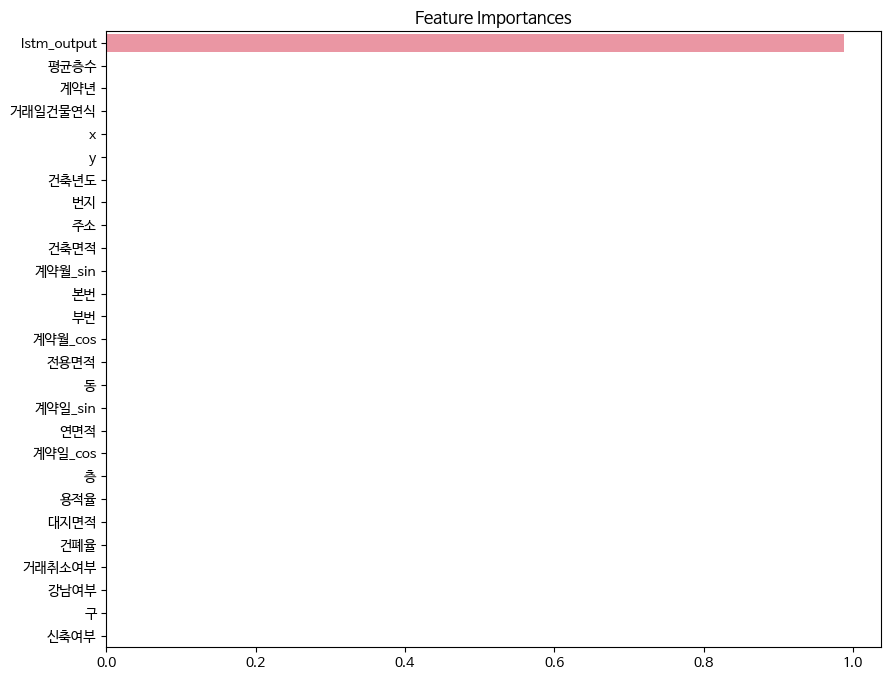

In [171]:
importances = pd.Series(xgb_model.feature_importances_, index=list(X_train_split.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

### 5.3. Feature selection

- 어떤 변수가 유용한 변수인지 확인해보기 위해 permutation selection을 이용해보겠습니다.

In [172]:
# # Permutation importance 방법을 변수 선택에 이용해보겠습니다.
# perm = PermutationImportance(model,        # 위에서 학습된 모델을 이용하겠습니다.
#                              scoring = "neg_mean_squared_error",        # 평가 지표로는 회귀문제이기에 negative rmse를 사용합니다. (neg_mean_squared_error : 음의 평균 제곱 오차)
#                              random_state = 42,
#                              n_iter=3).fit(X_val, y_val)
# eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # valid data에 대해 적합시킵니다.

In [173]:
# Permutation importance 방법을 변수 선택에 이용해보겠습니다.
perm = PermutationImportance(xgb_model,        # 위에서 학습된 모델을 이용하겠습니다.
                             scoring = "neg_mean_squared_error",        # 평가 지표로는 회귀문제이기에 negative rmse를 사용합니다. (neg_mean_squared_error : 음의 평균 제곱 오차)
                             random_state = 42,
                             n_iter=3).fit(X_val_split, y_val_split)
eli5.show_weights(perm, feature_names = X_val_split.columns.tolist())    # valid data에 대해 적합시킵니다.

Weight,Feature
375413.0765 ± 1472.6541,lstm_output
656.9298 ± 9.8414,계약년
290.0789 ± 17.9620,평균층수
259.3308 ± 33.3798,전용면적
236.0288 ± 2.5231,x
189.8276 ± 3.7485,y
177.0403 ± 5.8363,거래일건물연식
166.7666 ± 21.5746,계약월_sin
97.0240 ± 14.4352,건축년도
38.9543 ± 8.9216,주소


- 분석 결과 "계약년", "전용면적" 변수가 유의한 변수로 보입니다. 따라서 이 변수로 또 다른 파생변수를 더 생성해보거나, 중요도가 낮아보이는 변수를 제거해 차원의 저주를 막아볼 수도 있습니다.

### 5.4. Valid prediction 분석

- 예측값을 분석해보기 위해 valid prediction을 확인해보겠습니다.

In [174]:
# # Validation dataset에 target과 pred 값을 채워주도록 하겠습니다.
# X_val['target'] = y_val
# X_val['pred'] = pred

In [175]:
# Validation dataset에 target과 pred 값을 채워주도록 하겠습니다.
X_val_split['target'] = y_val_split
X_val_split['pred'] = pred_1

In [176]:
# # Squared_error를 계산하는 함수를 정의하겠습니다.
# def calculate_se(target, pred):
#     squared_errors = (target - pred) ** 2
#     return squared_errors

# # RMSE 계산
# squared_errors = calculate_se(X_val['target'], X_val['pred'])
# X_val['error'] = squared_errors

In [177]:
# Squared_error를 계산하는 함수를 정의하겠습니다.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE 계산
squared_errors = calculate_se(X_val_split['target'], X_val_split['pred'])
X_val_split['error'] = squared_errors

In [178]:
# # Error가 큰 순서대로 sorting 해 보겠습니다.
# X_val_sort = X_val.sort_values(by='error', ascending=False)       # 내림차순 sorting

In [179]:
# Error가 큰 순서대로 sorting 해 보겠습니다.
X_val_sort = X_val_split.sort_values(by='error', ascending=False)       # 내림차순 sorting

In [180]:
X_val_sort.head()

,전용면적,층,건축년도,x,y,계약년,거래일건물연식,건축면적,연면적,대지면적,...,강남여부,신축여부,lstm_output,계약월_sin,계약월_cos,계약일_sin,계약일_cos,target,pred,error
1080236,107.47,3,1973,126.989036,37.505354,0.777778,48,649.990000,3354.080000,144209.802120,...,1,0,4162.875488,5.000000e-01,-8.660254e-01,-0.571268,0.820763,4270.959337,479143.240469,2.255037e+11
1111671,115.65,17,2009,126.995023,37.503087,0.833333,13,14870.980000,358547.530000,328908.732808,...,1,1,4115.742676,-1.000000e+00,-1.836970e-16,-0.897805,-0.440394,4262.862084,478171.244751,2.245892e+11
1122326,106.26,1,1973,126.989036,37.505354,0.888889,50,649.990000,3354.080000,144209.802120,...,1,0,4228.347168,8.660254e-01,-5.000000e-01,0.485302,-0.874347,4536.043666,455507.616416,2.033754e+11
1102727,119.41,26,2021,127.026003,37.489008,0.833333,1,15922.981687,115229.229938,260979.766113,...,1,1,3657.272217,5.000000e-01,8.660254e-01,-0.571268,0.820763,3768.528599,448510.198706,1.977952e+11
1082724,112.96,5,2016,126.992772,37.505457,0.777778,5,15922.981687,115229.229938,260979.766113,...,1,1,3629.653809,1.224647e-16,-1.000000e+00,0.101168,-0.994869,3718.130312,448236.807656,1.975969e+11


- 예측을 잘 하지 못한 top 100개의 데이터와 예측을 잘한 top 100개의 데이터를 비교해보겠습니다.

In [181]:
# X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # 예측을 잘 하지못한 top 100개의 data
# X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # 예측을 잘한 top 100개의 data

In [182]:
X_val_sort_top100 = X_val_split.sort_values(by='error', ascending=False).head(100)        # 예측을 잘 하지못한 top 100개의 data
X_val_sort_tail100 = X_val_split.sort_values(by='error', ascending=False).tail(100)       # 예측을 잘한 top 100개의 data

In [183]:
# 해석을 위해 레이블인코딩 된 변수를 복원해줍니다.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [184]:
display(error_top100.head(1))
display(best_top100.head(1))

,전용면적,층,건축년도,x,y,계약년,거래일건물연식,건축면적,연면적,대지면적,...,강남여부,신축여부,lstm_output,계약월_sin,계약월_cos,계약일_sin,계약일_cos,target,pred,error
1080236,107.47,3,1973,126.989036,37.505354,0.777778,48,649.99,3354.08,144209.80212,...,1,0,4162.875488,0.5,-0.866025,-0.571268,0.820763,4270.959337,479143.240469,2.255037e+11


,전용면적,층,건축년도,x,y,계약년,거래일건물연식,건축면적,연면적,대지면적,...,강남여부,신축여부,lstm_output,계약월_sin,계약월_cos,계약일_sin,계약일_cos,target,pred,error
3768,45.76,1,1997,126.886897,37.487061,0.0,10,55.12,275.6,79.0,...,0,1,120.384674,0.5,0.866025,-0.724793,0.688967,120.192308,7148.182476,4.939265e+07


- 이제 분포를 비교해보도록 하겠습니다.

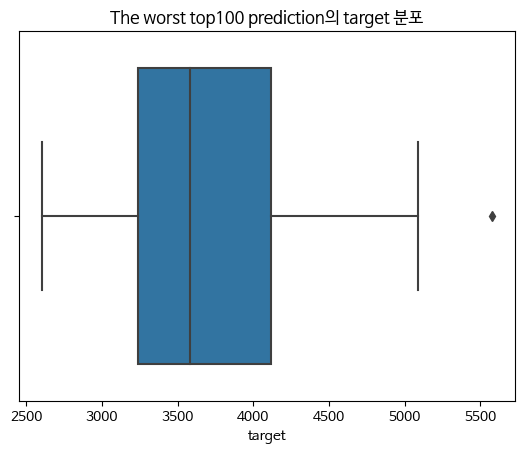

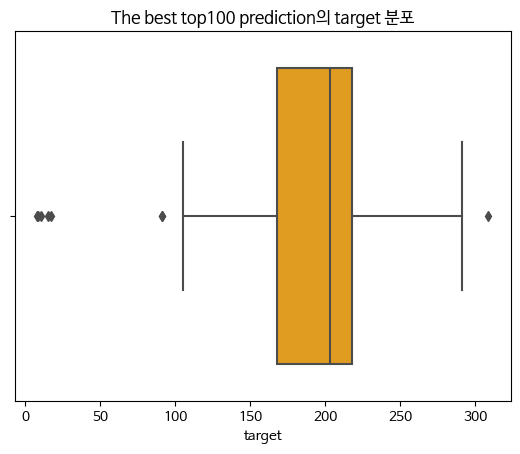

In [185]:
sns.boxplot(data = error_top100, x='target')
plt.title('The worst top100 prediction의 target 분포')
plt.show()

sns.boxplot(data = best_top100, x='target', color='orange')
plt.title('The best top100 prediction의 target 분포')
plt.show()

- Taget 분포를 보니 좋은 예측을 보인 top 100개의 data보다 상대적으로 나쁜 예측을 보인 top 100 dataset들이 높은 가격을 보였음을 확인할 수 있습니다. 이에 대한 모델링 및 처리가 필요해보입니다.

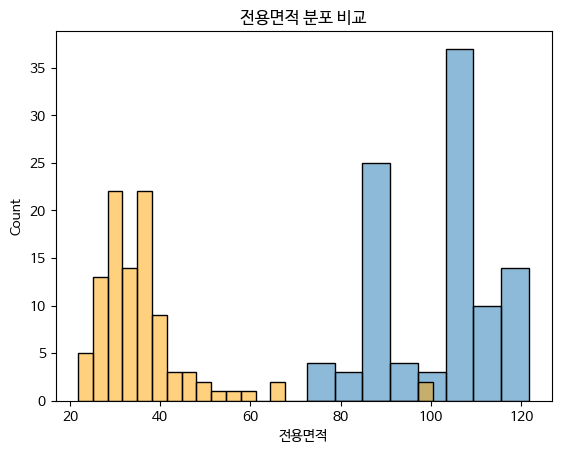

In [186]:
sns.histplot(data = error_top100, x='전용면적', alpha=0.5)
sns.histplot(data = best_top100, x='전용면적', color='orange', alpha=0.5)
plt.title('전용면적 분포 비교')
plt.show()

- 전용면적 또한 나쁜 예측을 보인 집들이 더 넓음을 확인할 수 있습니다.

## 6. Inference

In [187]:
dt_test.head(2)      # test dataset에 대한 inference를 진행해보겠습니다.

,번지,본번,부번,전용면적,층,건축년도,주소,x,y,계약년,...,대지면적,건폐율,용적율,평균층수,target,계약월_sin,계약월_cos,계약일_sin,계약일_cos,lstm_output
1131730,106,19,175,59.88,5,2000,92,127.058402,37.496387,0.888889,...,230824.309402,302.928185,3219.730933,16.386014,0,-0.5,-0.866025,0.201299,0.97953,-1.124290
1131731,2318,709,1,76.79,14,1979,97,127.065327,37.497418,0.888889,...,499755.072766,324.523684,3530.891261,12.733967,0,-0.5,-0.866025,0.201299,0.97953,-0.758163


In [188]:
# 저장된 모델을 불러옵니다.
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [189]:
# DataFrame의 columns 속성으로 feature names 확인
feature_names = X_test_xgb.columns
print("Feature names used in the model:", feature_names)
print(X_test_xgb.columns)

Feature names used in the model: Index(['전용면적', '층', '건축년도', 'x', 'y', '계약년', '거래일건물연식', '건축면적', '연면적', '대지면적',
       '건폐율', '용적율', '평균층수', '번지', '본번', '부번', '주소', '거래취소여부', '구', '동',
       '강남여부', '신축여부', 'lstm_output', '계약월_sin', '계약월_cos', '계약일_sin',
       '계약일_cos'],
      dtype='object')
Index(['전용면적', '층', '건축년도', 'x', 'y', '계약년', '거래일건물연식', '건축면적', '연면적', '대지면적',
       '건폐율', '용적율', '평균층수', '번지', '본번', '부번', '주소', '거래취소여부', '구', '동',
       '강남여부', '신축여부', 'lstm_output', '계약월_sin', '계약월_cos', '계약일_sin',
       '계약일_cos'],
      dtype='object')


In [190]:
# %%time
# X_test = dt_test.drop(['target'], axis=1)

# # Test dataset에 대한 inference를 진행합니다.
# real_test_pred = model.predict(X_test)

In [191]:
# X_test = X_test_xgb.drop(['target'], axis=1)

# Test dataset에 대한 inference를 진행합니다.
real_test_pred = model.predict(X_test_xgb)

In [192]:
real_test_pred          # 예측값들이 출력됨을 확인할 수 있습니다.

array([117.72429, 154.96404, 120.78615, ..., 159.67493, 139.82094,
       144.95526], dtype=float32)

## 7. Output File Save

In [205]:
# 1. 테스트 데이터의 feature names 확인
feature_names = X_test_xgb.columns
print("Feature names used in the test data:", feature_names)

# 2. 모델 학습 시 사용된 feature names 확인
model_feature_names = model.get_booster().feature_names
print("Feature names used in the model:", model_feature_names)

# 3. 예측에 필요한 feature만 선택 (모델이 학습할 때 사용한 feature만 선택)
# 학습에 사용된 feature만 선택해서 test 데이터셋에서 사용
X_test_xgb = X_test_xgb[model_feature_names]

# # 4. 스케일러를 이용해 테스트 데이터를 스케일 조정 (LSTM과 동일한 스케일러를 사용)
# X_test_scaled = scaler.transform(X_test_xgb)

# # 5. 스케일된 데이터를 XGBoost 모델에 입력하여 예측을 수행
# real_test_pred = model.predict(X_test_scaled)

# # 6. 예측된 결과를 다시 원래의 스케일로 복원 (선택 사항)
# real_test_pred_original_scale = scaler.inverse_transform(real_test_pred.reshape(-1, 1))

# # 7. 복원된 예측 결과 출력 또는 저장
# print(real_test_pred_original_scale)

# # 예측 결과를 CSV로 저장 (복원된 결과 사용)
# preds_df = pd.DataFrame(real_test_pred_original_scale.astype(int), columns=["target"])
# preds_df.to_csv('output.csv', index=False)

Feature names used in the test data: Index(['전용면적', '층', '건축년도', 'x', 'y', '계약년', '거래일건물연식', '건축면적', '연면적', '대지면적',
       '건폐율', '용적율', '평균층수', '번지', '본번', '부번', '주소', '거래취소여부', '구', '동',
       '강남여부', '신축여부', 'lstm_output', '계약월_sin', '계약월_cos', '계약일_sin',
       '계약일_cos'],
      dtype='object')
Feature names used in the model: ['전용면적', '층', '건축년도', 'x', 'y', '계약년', '거래일건물연식', '건축면적', '연면적', '대지면적', '건폐율', '용적율', '평균층수', '번지', '본번', '부번', '주소', '거래취소여부', '구', '동', '강남여부', '신축여부', 'lstm_output', '계약월_sin', '계약월_cos', '계약일_sin', '계약일_cos']


In [208]:
X_test_xgb.head(10000)
X_test_xgb.columns

Index(['전용면적', '층', '건축년도', 'x', 'y', '계약년', '거래일건물연식', '건축면적', '연면적', '대지면적',
       '건폐율', '용적율', '평균층수', '번지', '본번', '부번', '주소', '거래취소여부', '구', '동',
       '강남여부', '신축여부', 'lstm_output', '계약월_sin', '계약월_cos', '계약일_sin',
       '계약일_cos'],
      dtype='object')

In [193]:
# 앞서 예측한 예측값들을 저장합니다.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('output.csv', index=False)

In [195]:
real_test_pred_original_scale = scaler.inverse_transform(real_test_pred.reshape(-1, 1))
print(real_test_pred) 

ValueError: non-broadcastable output operand with shape (9390,1) doesn't match the broadcast shape (9390,19)